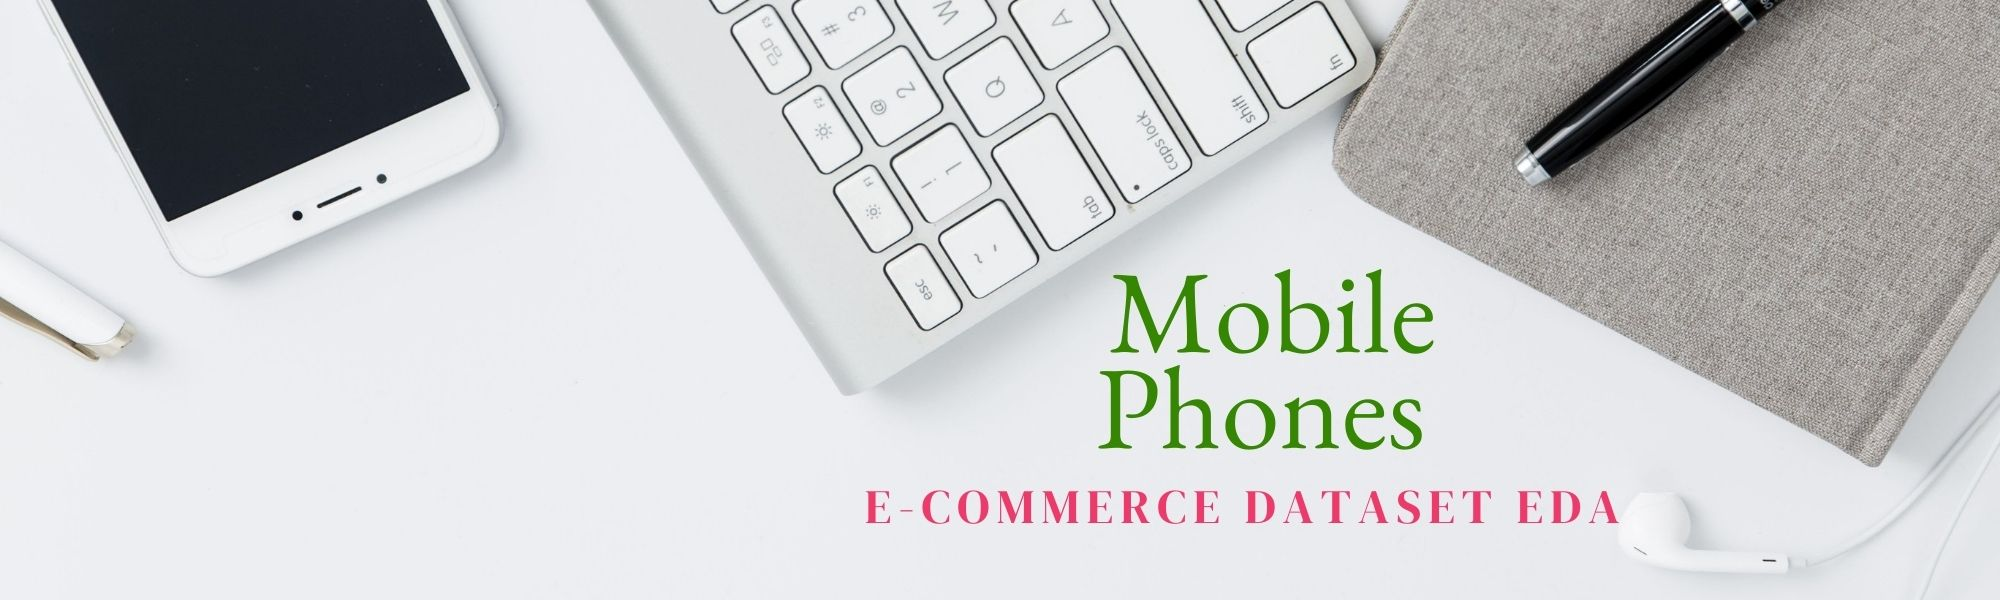

This dataset containing specs of various Mobile brands in India has been scraped from an ecommerce website 'Flipkart'.
This dataset has 3114 samples with 8 attributes. There are some missing values as well.
1. Brand- Name of the Mobile Manufacturer
2. Model- Model number of the Mobile Phone
3. Color- Color of the model. 
4. Memory - RAM of the model (4GB,6GB,8GB, etc.)
5. Storage- ROM of the model (32GB,64GB,128GB,256GB, etc.)
6. Rating- Rating of the model based on reviews (out of 5). Missing or Null values indicate there are no ratings present for the model. 
7. Selling Price- Selling Price/Discounted Price of the model in INR when this data was scraped. Ideally price indicates the discounted price of the model
8. Original Price- Actual price of the model in INR. 

---

This notebook provides a basic EDA of the dataset.
You can use this dataset to answer some interesting questions like-
*   Different Price range segments for mobiles in India
*   Brand with most product offerings for the Indian Market
*   Brand catering to all different segments (low range, mid range, premium - *an additional data column would be required to sort the data in the above segments)
* Most common specs offered by various brands (eg. if 4 GB memory and 64GB storage models are more commonly offered by all brands)
*   Compare premium offerings by top brands
*   Most commonly offered colors by all Brands
*   Compare Two Brands based on specs
*   Are higher rated mobiles always premium or expensive?
*   Does a brand have better than 4 ratings for all its products?
*   and so on...








<h3 style="font-family: Trebuchet MS;background-color:#4F359B;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('../input/flipkart-mobiles-dataset/Flipkart_Mobiles.csv')

In [3]:
df.shape

(3114, 8)

In [4]:
#print first 5 rows of the dataset
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [5]:
#print last 5 rows of the dataset
df.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989
3113,SAMSUNG,M52 5G,Sky Blue,8 GB,128 GB,4.2,20350,22595


In [6]:
#fillna values
df.fillna(0).iloc[:3]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990


In [7]:
#distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2970.0,4.243098,0.271991,2.3,4.10,4.3,4.4,5.0
Selling Price,3114.0,26436.625562,30066.892622,1000.0,9990.00,15000.0,28999.0,179900.0
Original Price,3114.0,28333.473025,31525.599889,1000.0,10030.25,16889.5,31500.0,189999.0


In [8]:
#check for data types
df.dtypes

Brand              object
Model              object
Color              object
Memory             object
Storage            object
Rating            float64
Selling Price       int64
Original Price      int64
dtype: object

<h3 style="font-family: Trebuchet MS;background-color:#4F359B;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Exploring Dataset </centre></strong></h3>

<AxesSubplot:>

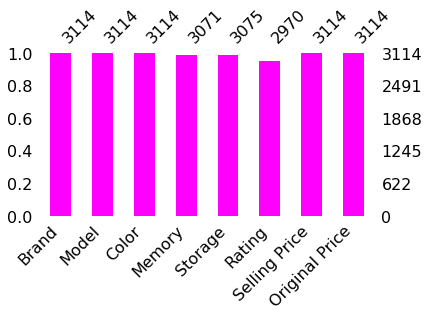

In [9]:
#visualize missing numbers in the dataset
msno.bar(df,figsize=(6,3),color='magenta')

In [10]:
df['Brand'].groupby(df['Brand']).count().sort_values(ascending=False)

Brand
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: Brand, dtype: int64

In [11]:
df['Brand'].groupby(df['Memory']).count().sort_values(ascending=False)

Memory
4 GB      750
3 GB      498
6 GB      497
2 GB      390
8 GB      345
1 GB      193
4GB       137
12 GB      63
512 MB     46
4 MB       39
1.5 GB     29
16 MB      16
64 MB      15
32 MB      14
8 MB       14
768 MB      6
128 MB      4
10 MB       3
2 MB        2
18 GB       2
46 MB       2
16 GB       2
32 GB       1
153 MB      1
100 MB      1
30 MB       1
Name: Brand, dtype: int64

In [12]:
sns.set_style("white")

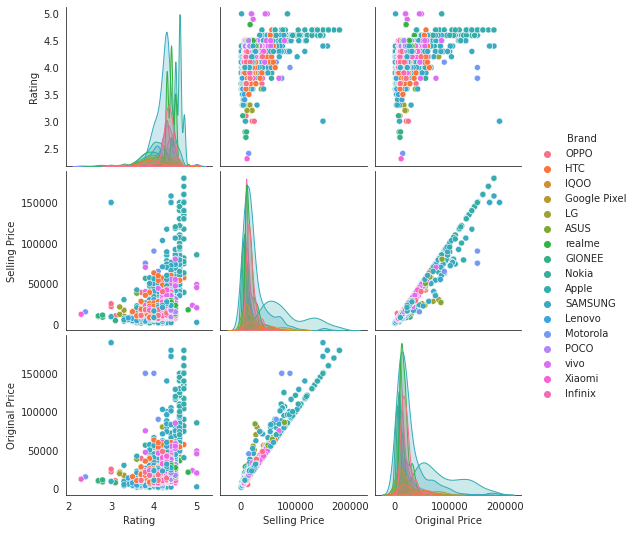

In [13]:
sns.pairplot(df, hue='Brand')

In [14]:
df.keys()

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price'],
      dtype='object')

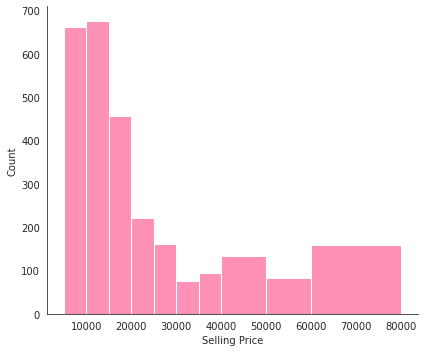

In [15]:
sns.displot(df, x= 'Selling Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e')

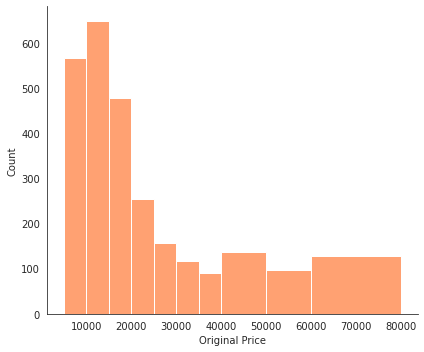

In [16]:
sns.displot(df, x='Original Price',
            bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], 
            aspect=1.2,color='#ff8243')

It is quite clear that the market is saturated with lower to mid range cost phones i.e. <25000 INR

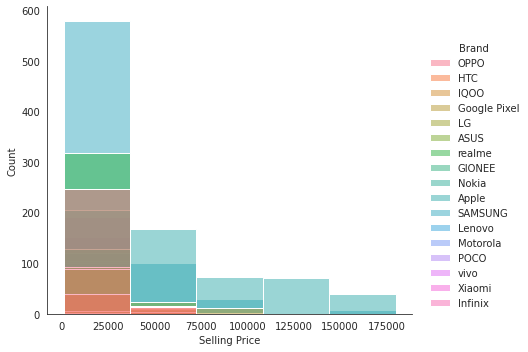

In [17]:
#brandwise mobile phone price segments
sns.displot(df, x='Selling Price',bins=5, hue='Brand',aspect=1.2)

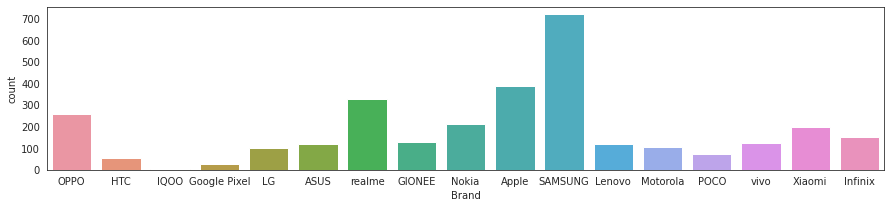

In [18]:
fig, ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x="Brand", data=df)

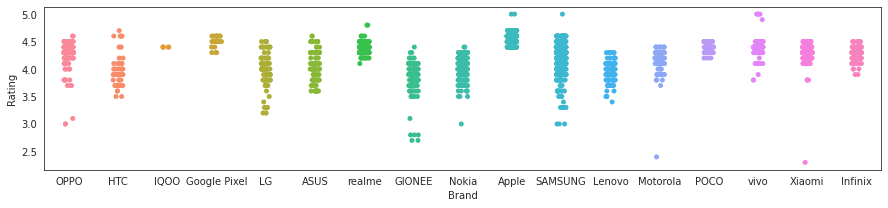

In [19]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Rating", x="Brand", data=df)

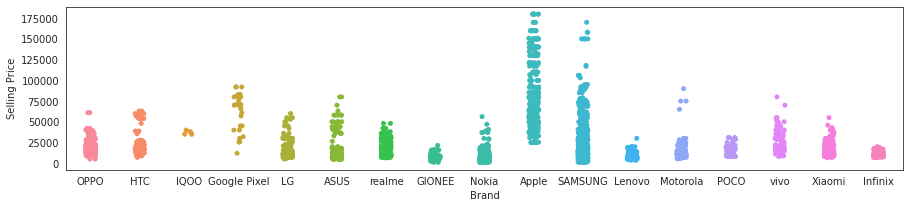

In [20]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Selling Price", x="Brand", data=df)

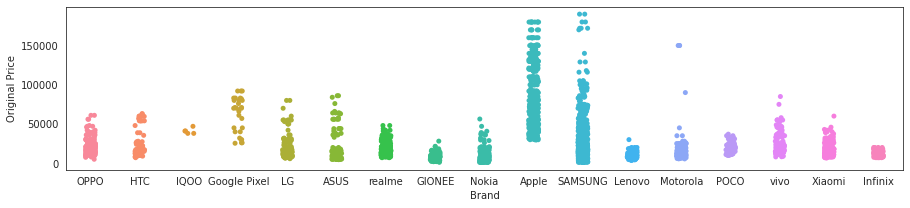

In [21]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Original Price", x="Brand", data=df)

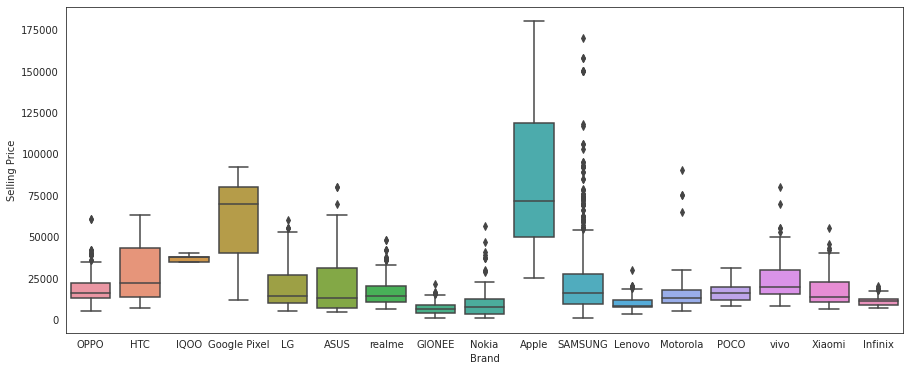

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x="Brand", y="Selling Price", data=df)

In [23]:
# Brandwise Mean Selling prices
round(df.groupby('Brand')['Selling Price'].mean(),0).sort_values(ascending=False)

Brand
Apple           81986.0
Google Pixel    61392.0
IQOO            37190.0
HTC             28314.0
SAMSUNG         24296.0
vivo            23866.0
ASUS            20327.0
LG              19323.0
OPPO            18560.0
Xiaomi          16942.0
POCO            16871.0
realme          16397.0
Motorola        16357.0
Infinix         11092.0
Lenovo          10084.0
Nokia            9429.0
GIONEE           7135.0
Name: Selling Price, dtype: float64